In [1]:
from IPython.display import display, Math

In [2]:
# As seguintes librarias serão necessárias para resolver os exercícios
# O numpy permite efetuar cálculos de forma eficiente
# sobre vários números (arrays)
import numpy as np
# O matplotlib e o seu módulo pyplot oferecem
# uma interface simples para gerar gráficos
import matplotlib.pyplot as plt
# O sympy traz cálculo simbólico ao python
import sympy

# Exercício 1

Um carro A segue numa estrada à velocidade constante de 70 km/h onde o limite de
velocidade é de 40 km/h. Ao passar por um carro patrulha, este último parte em sua
perseguição à aceleração constante de 2,0 $\text{m/s}^2$.

a) Faça o gráfico da lei do movimento do carro A e do carro patrulha, $x = x(t)$.

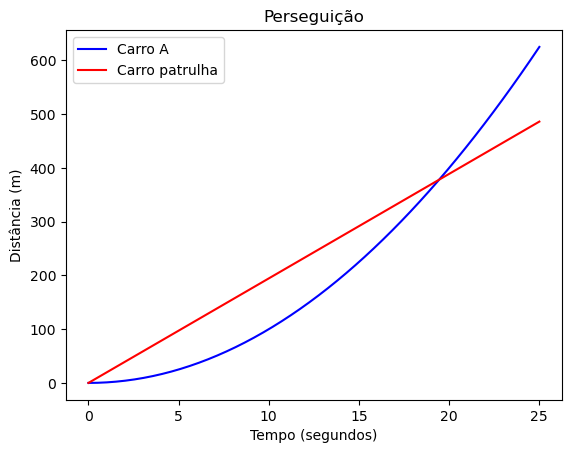

In [3]:
VELOCIDADE_CARRO = 70 * (1000 / 3600) # Convert from km/h to m/s
ACELERACAO_POLICIA = 2.0

# Gerar o eixo do tempo, o valor máximo foi encontrado de modo a
# que o ponto de interseção dos dois carros apareça no gráfico.
t = np.linspace(0, 25)

# Utilizamos a fórmula de aceleração uniforme para calcular a posição do carro
plt.plot(t, 1 / 2 * ACELERACAO_POLICIA * t**2, "b", label="Carro A")
plt.plot(t, VELOCIDADE_CARRO * t, "r", label="Carro patrulha")
plt.xlabel("Tempo (segundos)")
plt.ylabel("Distância (m)")
plt.legend(loc="upper left")
plt.title("Perseguição")
plt.show()

b) Em que instante e qual a distância percorrida pelo carro patrulha quando este último
alcança o carro em infração?

Começamos por calcular o instante em que se intersetam, dado que um têm velocidade constante e outro têm aceleração uniforme, podemos usar a seguinte fórmula para calcular o instante de interseção.

$$
\begin{align*}
\frac{1}{2} a t^2 = v t &\Leftrightarrow \frac{1}{2} a t^2 - v t = 0 \\
&\Leftrightarrow t = \frac{v \pm \sqrt{v^2}}{2 \times \frac{1}{2} \times a} \\
&\Leftrightarrow t = \frac{v \pm \sqrt{v^2}}{a} \\
&\Leftrightarrow t = \frac{v \pm v}{a} \\
&\Leftrightarrow t = 0 \vee t = \frac{2v}{a}
\end{align*}
$$

De seguida podemos só multiplicar esse instante pela velocidade do carro para calcular a distância a origem.

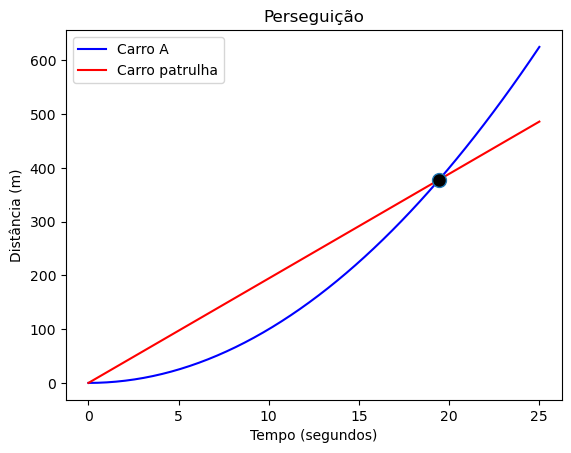

In [4]:
# Instante de interseção
tIntersect = (2 * VELOCIDADE_CARRO) / ACELERACAO_POLICIA

plt.plot(t, 1 / 2 * ACELERACAO_POLICIA * t**2, "b", label="Carro A")
plt.plot(t, VELOCIDADE_CARRO * t, "r", label="Carro patrulha")
# Marcar o ponto de interseção
plt.plot(
    tIntersect,
    VELOCIDADE_CARRO * tIntersect,
    marker="o",
    markersize=10,
    markerfacecolor="black",
)
plt.xlabel("Tempo (segundos)")
plt.ylabel("Distância (m)")
plt.legend(loc="upper left")
plt.title("Perseguição")
plt.show()

In [5]:
display(Math(r't = {:.8f}'.format(tIntersect)))
display(Math(r'd = {:.8f}'.format(VELOCIDADE_CARRO * tIntersect)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Exercício 2

Um volante de badmington foi largado de uma altura considerável. A lei do movimento é

$$
y(t) = \frac{v^2_T}{g} log \left[ cosh \left( \frac{gt}{v_T} \right) \right]
$$

em que a terminal do volante $v_T$ é 6.80 m/s.

a) Faça o gráfico da lei do movimento $y(t)$ de 0 a 4.0 s.

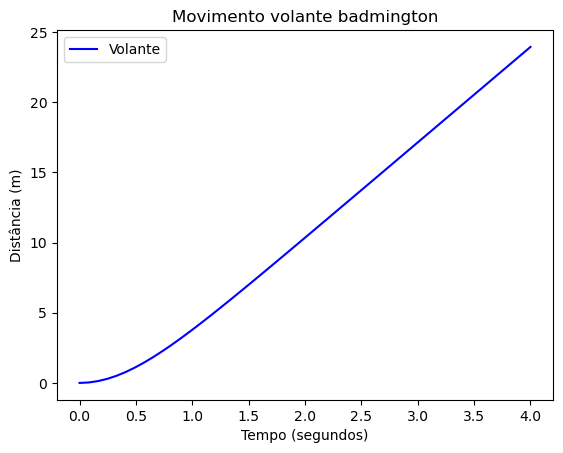

In [6]:
VELOCIDADE_TERMINAL = 6.8
ACELERACAO_GRAVITICA = 9.8

# sympy.symbols define as variavéis que vamos usar na
# nossa equação.
vT, g, t = sympy.symbols("vT, g, t")
# A fórmula do movimento com as variavéis
y = (vT**2 / g) * sympy.log(sympy.cosh(g * t / vT))

# expr.subs([var, value]+) troca todas as variáveis pelo
# valor associado a elas na expressão.
y2 = y.subs([(vT, VELOCIDADE_TERMINAL), (g, ACELERACAO_GRAVITICA)])

# sympy.lambdify(args, expr) transforma uma expressão `expr`
# matemática numa função python com `args` argumentos.
# "numpy" significa que o sympy vai usar os tipos do numpy
# para implementar a função.
y_lam = sympy.lambdify(t, y2, "numpy")

# A reta real
x = np.linspace(0, 4)

plt.plot(x, y_lam(x), "b", label="Volante")
plt.xlabel("Tempo (segundos)")
plt.ylabel("Distância (m)")
plt.legend(loc="upper left")
plt.title("Movimento volante badmington")
plt.show()

b) Determine a velocidade instantânea em função do tempo, usando cálculo simbólico. Faça o gráfico da
velocidade em função do tempo de 0 a 4 s, usando o pacote matplotlib.

Para obter a velocidade a partir da posição, utilizando cálculo simbólico, basta obtermos a derivada da expressão da posição.

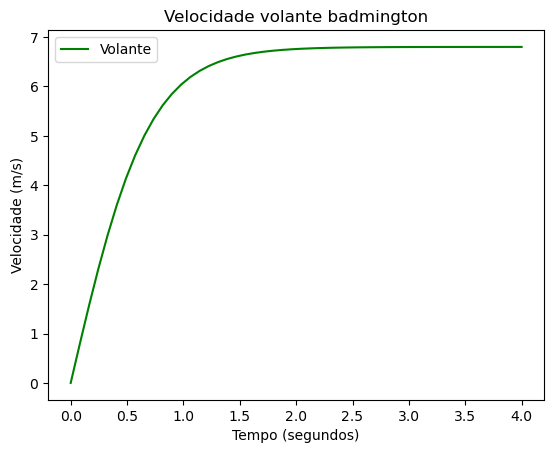

In [7]:
# sympy.diff calcula a derivada da expressão passada
# com base na variável passade em segundo argumento (`t`)
diff_y = sympy.diff(y2, t)
diff_y_lam = sympy.lambdify(t, diff_y, "numpy")

plt.plot(x, diff_y_lam(x), "g", label="Volante")
plt.xlabel("Tempo (segundos)")
plt.ylabel("Velocidade (m/s)")
plt.legend(loc="upper left")
plt.title("Velocidade volante badmington")
plt.show()

c) Determine a aceleração instantânea em função do tempo, usando cálculo simbólico. Faça o gráfico da aceleração
em função do tempo de 0 a 4 s, usando o pacote matplotlib.

Para obter a aceleração a partir da posição, utilizando cálculo simbólico, basta obtermos a derivada da velocidade, que por sua vez é a derivada da posição, ou seja a aceleração é a derivada de segunda ordem da posição.

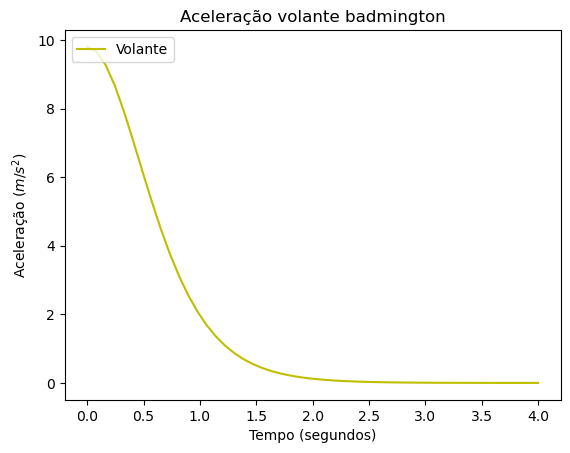

In [8]:
# Calcular a derivada da velocidade (2a ordem da posição)
diff2_y = sympy.diff(diff_y, t)
diff2_y_lam = sympy.lambdify(t, diff2_y, "numpy")

plt.plot(x, diff2_y_lam(x), "y", label="Volante")
plt.xlabel("Tempo (segundos)")
plt.ylabel("Aceleração ($m/s^2$)")
plt.legend(loc="upper left")
plt.title("Aceleração volante badmington")
plt.show()

d) Mostre que a aceleração $a_y(t) = g - \frac{g}{v_T^2} v_y \lvert v_y \rvert$ é igual à calculada na alínea anterior.

Podemos verificar se são iguais desenhando os dois gráficos e verificando que se sobrepõe.

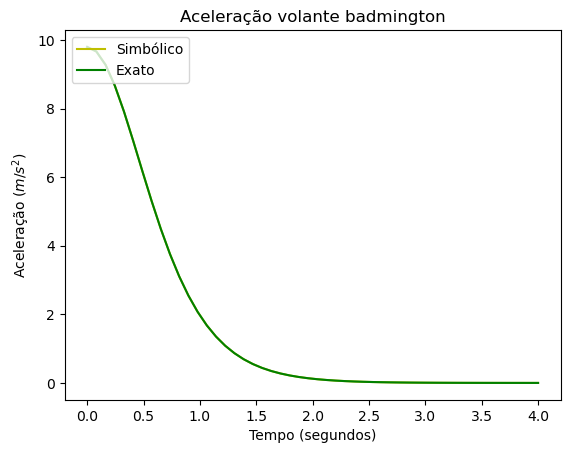

In [9]:
acel = g - (g / vT**2) * diff_y * sympy.Abs(diff_y)
acel2 = acel.subs([(vT, VELOCIDADE_TERMINAL), (g, ACELERACAO_GRAVITICA)])
acel_lam = sympy.lambdify(t, acel2, "numpy")

plt.plot(x, diff2_y_lam(x), "y", label="Simbólico")
plt.plot(x, acel_lam(x), "g", label="Exato")
plt.xlabel("Tempo (segundos)")
plt.ylabel("Aceleração ($m/s^2$)")
plt.legend(loc="upper left")
plt.title("Aceleração volante badmington")
plt.show()

e) Se o volante for largado de uma altura de 20 m, quanto tempo demora a atingir o solo? Compare com o tempo que demoraria se não houvesse resistência do ar.

Para calcularmos quanto tempo o volante demora a bater no chão podemos usar o método `sympy.nsolve`, este método calcula os zeros da função, como queremos calcular $y = 20$,
temos que utilizar a expressão $y - 20$.

Outra coisa que o `nsolve` precisa é de uma aproximação inicial do resultado, este pode ser obtido olhando para o gráfico e ver aproximadamente onde $y = 20$.

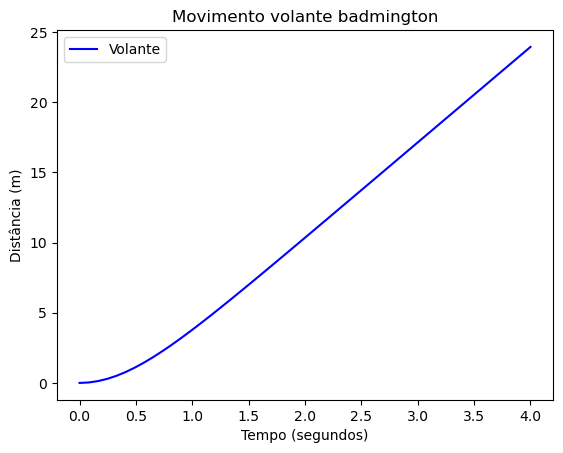

In [10]:
plt.plot(x, y_lam(x), "b", label="Volante")
plt.xlabel("Tempo (segundos)")
plt.ylabel("Distância (m)")
plt.legend(loc="upper left")
plt.title("Movimento volante badmington")
plt.show()

O valor do $y = 20$ encontra-se perto de $x = 3.5$ por isso vamos utilizá-lo como a nossa aproximação inicial.

In [11]:
tIntersect = sympy.nsolve(y2 - 20, t, 3.5)

In [12]:
display(Math(r't = {:.8f}'.format(tIntersect)))

<IPython.core.display.Math object>

Para calcular sem resistência do ar, podemos usar a lei do movimento uniformemente acelerado:

$$
y(t) = y_0 + v_0 t + \frac{1}{2} a t^2
$$

Como o volante é largado de uma altura de 20 m, sabemos que as variáveis têm os seguintes valores: $y_0 = 20$, $v_0 = 0$, $a = -9.8$ (Aceleração gravítica).

Logo a expressão fica:

$$
y(t) = 20 - 4.9t^2
$$

Podemos calcular diretamente quando $y(t) = 0$ (quando o volante bate no chão:

$$
\begin{align*}
y(t) = 0 &\Leftrightarrow 20 - 4.9t^2 = 0 \\
&\Leftrightarrow 4.9t^2 = 20 \\
&\Leftrightarrow 4.9t^2 = 20 \\
&\Leftrightarrow t^2 = \frac{200}{49} \\
&\Leftrightarrow t = \sqrt{\frac{200}{49}} \\
&\Leftrightarrow t = \frac{10 \sqrt{2}}{7} \approx 2.02030509 \; \text{s}
\end{align*}
$$

f) Nas condições da alínea anterior, qual o valor da velocidade e da aceleração quando o volante chega ao solo?

## Com resistência do ar

In [13]:
# np.float64 converte um float do python num float do numpy, isto é
# necessário pois as funções geradas pelo sympy com o módulo numpy apenas
# aceitam tipos do numpy.
vIntersect = diff_y_lam(np.float64(tIntersect))
aIntersect = diff2_y_lam(np.float64(tIntersect))

In [14]:
display(Math(r'v = {:.8f}'.format(vIntersect)))
display(Math(r'a = {:.8f}'.format(aIntersect)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Sem resistência do ar

Sem resistência do ar, a aceleração mantém se constante e é igual a aceleração gravítica (utilizamos $9.8 \; m/s^2$) e a velocidade é calculada pela seguinte expressão:

$$
v(t) = a t
$$

Substituindo:

$$
v\left( \frac{10 \sqrt{2}}{7} \right) = 9.8 \frac{10 \sqrt{2}}{7} \approx 19.79898987 \; m/s
$$